In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import reduce

In [6]:
all_df = pd.read_csv('data/all_results.csv')

In [7]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   program_id          345 non-null    int64  
 1   athlete_id          345 non-null    int64  
 2   athlete_first_name  345 non-null    object 
 3   athlete_last_name   345 non-null    object 
 4   country             345 non-null    object 
 5   start_number        345 non-null    int64  
 6   swim                345 non-null    object 
 7   t1                  345 non-null    object 
 8   bike                345 non-null    object 
 9   t2                  345 non-null    object 
 10  run                 345 non-null    object 
 11  position            345 non-null    float64
 12  total_time          345 non-null    object 
 13  event               345 non-null    object 
 14  host_country        345 non-null    object 
dtypes: float64(1), int64(3), object(11)
memory usage: 40.6+ K

**splits have been converted to object types; need to revert back to timedelta types and then for ease of analysis to SECONDS**

In [8]:
cols_to_change = ['swim', 't1', 'bike', 't2', 'run', 'total_time']

In [9]:
for x in cols_to_change:
    all_df[x] = pd.to_timedelta(all_df[x]).dt.total_seconds()

**Decided to remove program_id, start_number: superfluous.**

In [10]:
all_df.drop(['program_id', 'start_number'], axis=1, inplace=True)

**Decided to convert athlete_id to object to remove from numerical analysis**

In [11]:
all_df['athlete_id'] = all_df['athlete_id'].astype('object')

**initial graphics to viualise the spread of the data**

In [12]:
all_df.describe()

,swim,t1,bike,t2,run,position,total_time
count,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000
mean,1113.484058,35.869565,3487.463768,27.521739,1980.173913,25.208696,6642.773913
std,75.155772,11.953292,194.228406,6.316757,121.855537,14.359683,230.021083
min,1016.000000,16.000000,3076.000000,14.000000,1747.000000,1.000000,6213.000000
25%,1075.000000,26.000000,3378.000000,22.000000,1899.000000,13.000000,6498.000000
50%,1093.000000,38.000000,3528.000000,28.000000,1967.000000,25.000000,6617.000000
75%,1109.000000,47.000000,3556.000000,32.000000,2040.000000,37.000000,6759.000000
max,1393.000000,57.000000,4159.000000,43.000000,2574.000000,54.000000,7533.000000


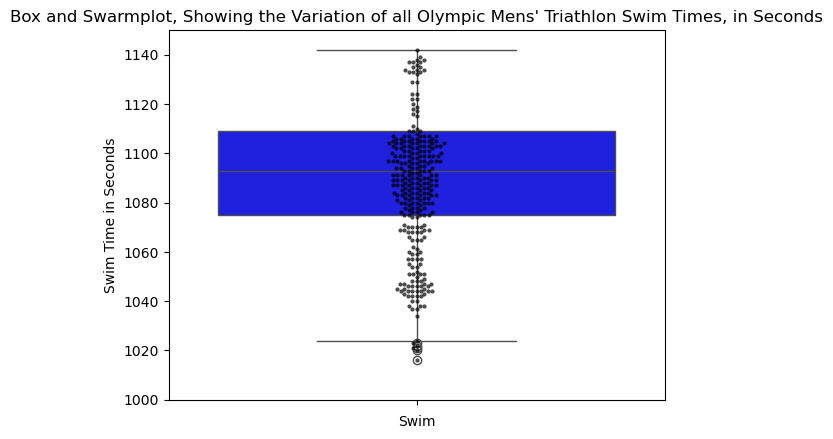

In [13]:
sns.boxplot(all_df['swim'], color='Blue')
sns.swarmplot(all_df['swim'], size=3, alpha=0.7, color='black')
plt.ylim(1000, 1150)
plt.title("Box and Swarmplot, Showing the Variation of all Olympic Mens' Triathlon Swim Times, in Seconds")
plt.xlabel('Swim')
plt.ylabel('Swim Time in Seconds');

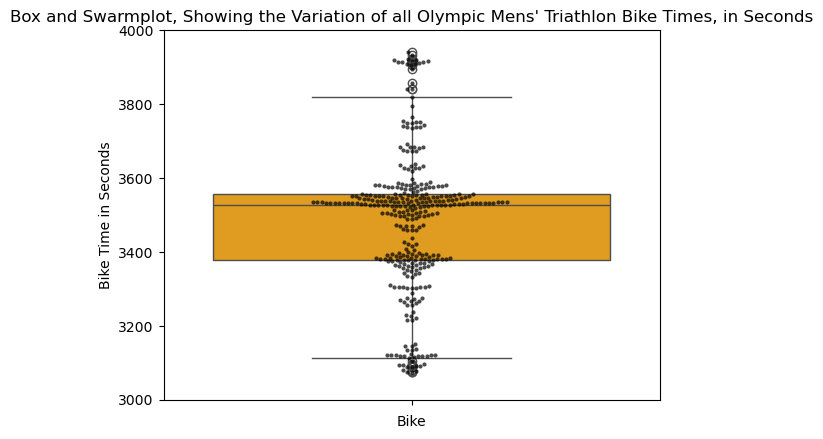

In [14]:
sns.boxplot(all_df['bike'], color='Orange')
sns.swarmplot(all_df['bike'], size=3, alpha=0.7, color='Black')
plt.ylim(3000, 4000)
plt.title("Box and Swarmplot, Showing the Variation of all Olympic Mens' Triathlon Bike Times, in Seconds")
plt.xlabel('Bike')
plt.ylabel('Bike Time in Seconds');

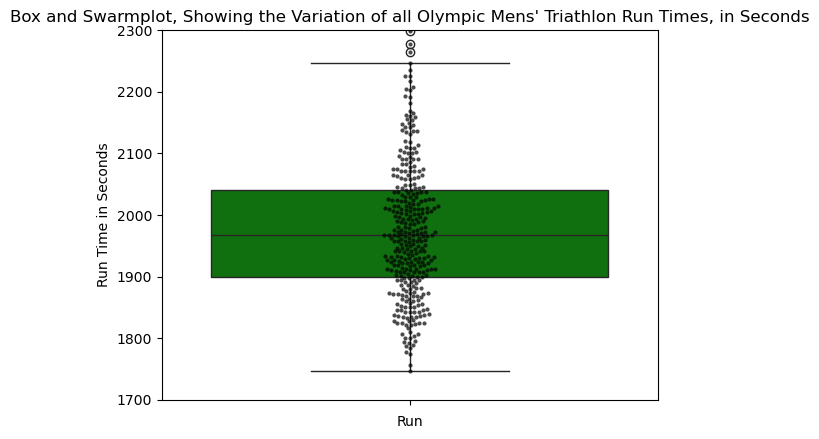

In [15]:
sns.boxplot(all_df['run'], color='Green')
sns.swarmplot(all_df['run'], size=3, alpha=0.7, color='Black')
plt.ylim(1700, 2300)
plt.title("Box and Swarmplot, Showing the Variation of all Olympic Mens' Triathlon Run Times, in Seconds")
plt.xlabel('Run')
plt.ylabel('Run Time in Seconds');

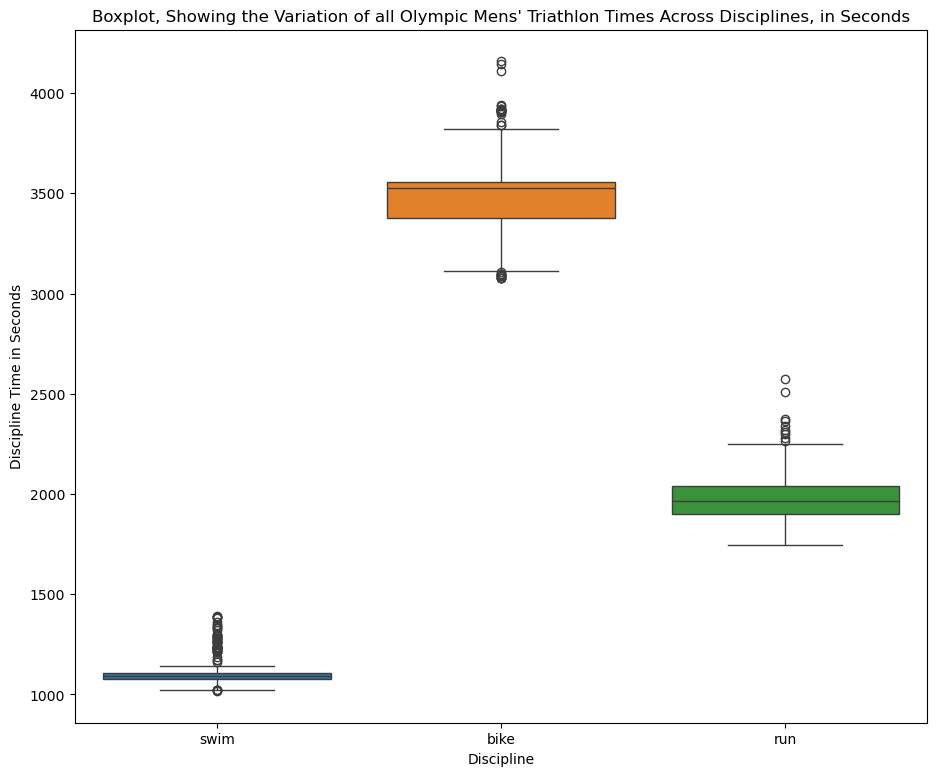

In [16]:
plt.figure(figsize=(11,9))
sns.boxplot(all_df[['swim', 'bike', 'run']])
plt.title("Boxplot, Showing the Variation of all Olympic Mens' Triathlon Times Across Disciplines, in Seconds")
plt.xlabel('Discipline')
plt.ylabel('Discipline Time in Seconds');

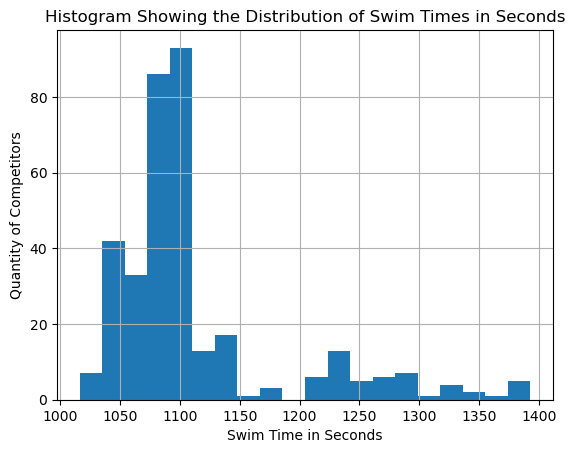

In [17]:
all_df['swim'].hist(bins=20)
plt.title('Histogram Showing the Distribution of Swim Times in Seconds')
plt.xlabel('Swim Time in Seconds')
plt.ylabel('Quantity of Competitors');

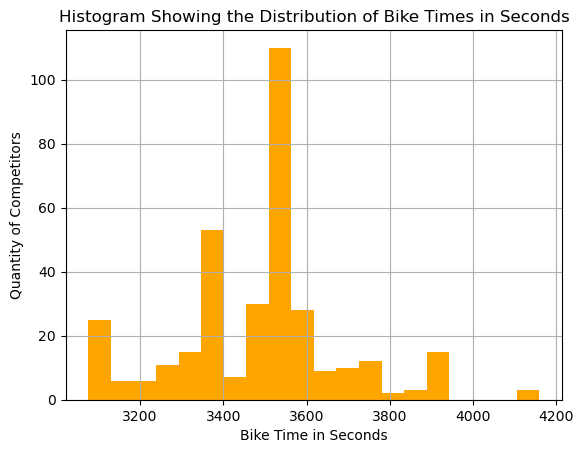

In [18]:
all_df['bike'].hist(color='Orange', bins=20)
plt.title('Histogram Showing the Distribution of Bike Times in Seconds')
plt.xlabel('Bike Time in Seconds')
plt.ylabel('Quantity of Competitors');


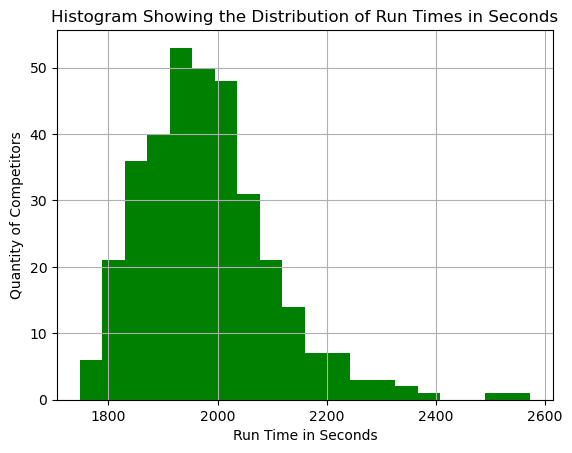

In [19]:
all_df['run'].hist(color='Green', bins=20)
plt.title('Histogram Showing the Distribution of Run Times in Seconds')
plt.xlabel('Run Time in Seconds')
plt.ylabel('Quantity of Competitors');

## **Initial, Summary Statistics Interpretation**

#### 1. Standard Deviation:
- **Swim:** `75.16 seconds`  
- **Bike:** `194.23 seconds`  
- **Run:** `121.86 seconds`  
- **T1 (Transition 1):** `11.95 seconds`  
- **T2 (Transition 2):** `6.32 seconds`  

<mark>**Bike discipline has the most variation,**</mark> providing the greatest potential to gain time over competitors.
The Swim and Run are the most competitive disciplines. It is harder to dominate in the swim and run. Moreover, it is most worthwhile to dominate in the bike, because the bike is where competitors have the greatest chance of gaining the greatest amount of time over competitors. 

- _There is little variation in transitions_ (T1, T2), and most athletes perform well in these areas.

#### 2. Min and 25th Percentile:
- **Swim:** `1016 seconds (min)` vs. `1075 seconds (25th percentile)` → **Difference:** `59 seconds`
- **Bike:** `3076 seconds (min)` vs. `3378 seconds (25th percentile)` → **Difference:** `302 seconds`
- **Run:** `1747 seconds (min)` vs. `1899 seconds (25th percentile)` → **Difference:** `152 seconds`
- **T1:** `16 seconds (min)` vs. `26 seconds (25th percentile)` → **Difference:** `10 seconds`
- **T2:** `14 seconds (min)` vs. `22 seconds (25th percentile)` → **Difference:** `8 seconds`

<mark>The fastest athletes on the bike</mark> tend to gain the most time on the other more compeititive triathletes, compared to the fastest athletes in the swim and run.

---

### **Conclusion**
The **_bike discipline appears to be the most decisive,_** as it offers the greatest opportunity to gain time over other competitors.

---

### **However**
- There is still a significant degree of variation in the **_run_**.  
- It remains uncertain whether the fastest on the bike usually wins the race.  
- While there is less variation in the **swim** and **run**, _both still play important roles_.
- The **run** often determines the final winner, while the **swim** could also be a key factor.

---

## **Further Inquiries**

1. _Correlation: Is there a correlation between disipline and race position? Does the fastest in the swim, bike, or run tend to win the race?_

**1. General Correlation: Determining whether correlations exist between disciplines and position**

In [20]:
swim_corr = all_df[['swim', 'position']].corr()
bike_corr = all_df[['bike', 'position']].corr()
run_corr = all_df[['run', 'position']].corr()

In [21]:
disc_pos_correlations = pd.concat((swim_corr.loc['swim'], bike_corr.loc['bike'], run_corr.loc['run']), axis=1)
print(disc_pos_correlations)

              swim      bike      run
swim      1.000000       NaN      NaN
position  0.201808  0.220643  0.69935
bike           NaN  1.000000      NaN
run            NaN       NaN  1.00000


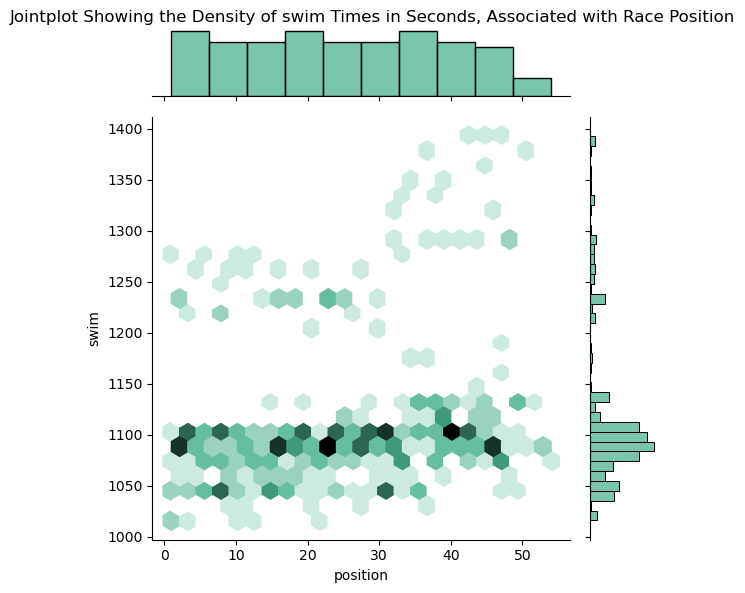

In [22]:
g = sns.jointplot(x=all_df['position'],
              y=all_df['swim'],
              kind="hex",
              color="#4CB391")

g.figure.suptitle('Jointplot Showing the Density of swim Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)

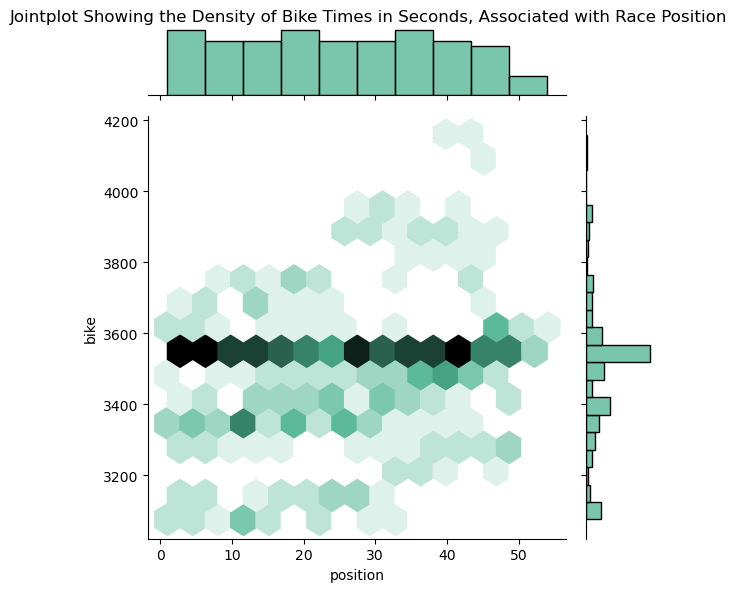

In [23]:
g = sns.jointplot(x=all_df['position'],
              y=all_df['bike'],
              kind="hex",
              color="#4CB391")

g.figure.suptitle('Jointplot Showing the Density of Bike Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)

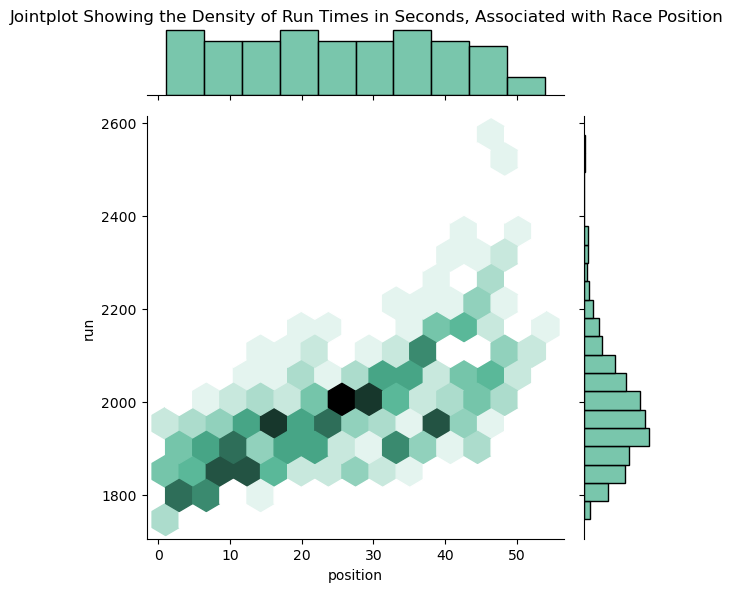

In [24]:
g = sns.jointplot(x=all_df['position'],
              y=all_df['run'],
              kind="hex",
              color="#4CB391")

g.figure.suptitle('Jointplot Showing the Density of Run Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)

### Overall Correlation Observations
- <mark> We can observe a strong association between **run**</mark>  time and race position: `p = 0.69935`
- There is a weak assocation between **bike/swim/t2** times and race position: `p = 0.220643, p = 0.201808, p = 0.226338`

**2. Specific Correlation: Determining whether correlations exist between _fastest_ in disciplines and _winning_**

1. retrieving fastest times per discipline, grouped by event

In [25]:
#min() to find the fastest of each discipline for each olympics
fastest_swimmers = all_df.groupby(['event'])[['swim']].min()
fastest_t1 = all_df.groupby(['event'])[['t1']].min()
fastest_riders = all_df.groupby(['event'])[['bike']].min()
fastest_t2 = all_df.groupby(['event'])[['t2']].min()
fastest_runners = all_df.groupby(['event'])[['run']].min()


In [26]:
print(type(fastest_swimmers))  # Should be a DataFrame
print(type(fastest_t1))        # Should be a DataFrame
print(type(fastest_riders))    # Should be a DataFrame
print(type(fastest_t2))        # Should be a DataFrame
print(type(fastest_runners))    # Should be a DataFrame

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [27]:
fastest_swimmers

,swim
event,
athens_2004,1069.0
beijing_2008,1080.0
london_2012,1016.0
paris_2024,1210.0
rio_2016,1038.0
sydney_2000,1037.0
tokyo_2020,1059.0


In [28]:
fastest = [fastest_swimmers, fastest_t1, fastest_riders, fastest_t2, fastest_runners]

In [29]:
pd.concat([fastest_swimmers, fastest_t1, fastest_riders, fastest_t2, fastest_runners], axis=1)

,swim,t1,bike,t2,run
event,,,,,
athens_2004,1069.0,16.0,3624.0,16.0,1911.0
beijing_2008,1080.0,24.0,3467.0,26.0,1845.0
london_2012,1016.0,35.0,3512.0,25.0,1747.0
paris_2024,1210.0,46.0,3076.0,21.0,1787.0
rio_2016,1038.0,45.0,3301.0,33.0,1834.0
sydney_2000,1037.0,17.0,3437.0,14.0,1852.0
tokyo_2020,1059.0,37.0,3356.0,26.0,1774.0


### Complimentary Observations

- fastest swim: london_2012, whereas the slowest (owing to strong river currents in the Senne) was in paris_2024
- fastest transitions in sydney_2000 and athens_2004. Likely due to a shorter distance from dismount to transition zone
- fastest bike: paris_2024 had a rapid bike, likely owing to a flatter and less technical course; athens_2004 was nearly 10mins longer. 
- run times similar.


2. renaming these dataframes to allow for more intuitive merge result

In [30]:
renamed_fastest = []

for x in fastest:
    x.rename(columns={x.columns[0]: 'minimum_' + x.columns[0] + '_time'}, inplace=True)
    renamed_fastest.append(x)

In [31]:
renamed_fastest[0]

,minimum_swim_time
event,
athens_2004,1069.0
beijing_2008,1080.0
london_2012,1016.0
paris_2024,1210.0
rio_2016,1038.0
sydney_2000,1037.0
tokyo_2020,1059.0


3. merging to combine fastest times per discipline per event, with all results

In [32]:
#merge these to dataframe to allow for comparison
data_frames = [all_df, fastest_swimmers, fastest_t1, fastest_riders, fastest_t2, fastest_runners]
df_merged_fastest_times = reduce(lambda  left,right: pd.merge(left,right,on=['event'],
                                            how='outer'), data_frames)

In [33]:
df_merged_fastest_times.head()

,athlete_id,athlete_first_name,athlete_last_name,country,swim,t1,bike,t2,run,position,total_time,event,host_country,minimum_swim_time,minimum_t1_time,minimum_bike_time,minimum_t2_time,minimum_run_time
0,5308,Hamish,Carter,NZL,1099.0,19.0,3624.0,17.0,1924.0,1.0,6666.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0
1,5297,Bevan,Docherty,NZL,1093.0,19.0,3632.0,19.0,1930.0,2.0,6674.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0
2,5320,Sven,Riederer,SUI,1097.0,17.0,3628.0,19.0,1951.0,3.0,6692.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0
3,5298,Greg,Bennett,AUS,1099.0,16.0,3673.0,19.0,1913.0,4.0,6701.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0
4,5321,Frederic,Belaubre,FRA,1084.0,19.0,3639.0,24.0,1978.0,5.0,6720.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0


4. Establishing whether a correlation exists between discipline fastest and position

In [34]:
#fastest athletes in each disciple in each event
fastest_swim_allrows = df_merged_fastest_times[df_merged_fastest_times['swim'] == df_merged_fastest_times['minimum_swim_time']]
fastest_t1_allrows = df_merged_fastest_times[df_merged_fastest_times['t1'] == df_merged_fastest_times['minimum_t1_time']]
fastest_bike_allrows = df_merged_fastest_times[df_merged_fastest_times['bike'] == df_merged_fastest_times['minimum_bike_time']]
fastest_t2_allrows = df_merged_fastest_times[df_merged_fastest_times['t2'] == df_merged_fastest_times['minimum_t2_time']]
fastest_run_allrows = df_merged_fastest_times[df_merged_fastest_times['run'] == df_merged_fastest_times['minimum_run_time']]

In [35]:
fastest_swim_allrows

,athlete_id,athlete_first_name,athlete_last_name,country,swim,t1,bike,t2,run,position,total_time,event,host_country,minimum_swim_time,minimum_t1_time,minimum_bike_time,minimum_t2_time,minimum_run_time
21,5300,Andy,Potts,USA,1069.0,17.0,3766.0,22.0,2082.0,22.0,6936.0,athens_2004,GRE,1069.0,16.0,3624.0,16.0,1911.0
78,5834,Shane,Reed,NZL,1080.0,27.0,3559.0,26.0,2074.0,34.0,6767.0,beijing_2008,CHN,1080.0,24.0,3467.0,26.0,1845.0
116,11092,Richard,Varga,SVK,1016.0,41.0,3555.0,30.0,1923.0,22.0,6565.0,london_2012,GBR,1016.0,35.0,3512.0,25.0,1747.0
178,107730,Alessio,Crociani,ITA,1210.0,49.0,3152.0,24.0,2064.0,30.0,6499.0,paris_2024,FRA,1210.0,46.0,3076.0,21.0,1787.0
209,11092,Richard,Varga,SVK,1038.0,49.0,3310.0,34.0,2006.0,11.0,6437.0,rio_2016,BRA,1038.0,45.0,3301.0,33.0,1834.0
229,14181,Igor,Polyanskiy,RUS,1038.0,51.0,3392.0,41.0,2029.0,31.0,6551.0,rio_2016,BRA,1038.0,45.0,3301.0,33.0,1834.0
275,5661,Craig,Walton,AUS,1037.0,26.0,3556.0,19.0,2015.0,27.0,6656.0,sydney_2000,AUS,1037.0,17.0,3437.0,14.0,1852.0
309,11143,Vincent,Luis,FRA,1059.0,39.0,3405.0,30.0,1851.0,13.0,6384.0,tokyo_2020,JPN,1059.0,37.0,3356.0,26.0,1774.0


In [36]:
print(fastest_swim_allrows[['swim', 'position']].corr())
print(fastest_t1_allrows[['t1', 'position']].corr())
print(fastest_bike_allrows[['bike', 'position']].corr())
print(fastest_t2_allrows[['t2', 'position']].corr())
print(fastest_run_allrows[['run', 'position']].corr())

              swim  position
swim      1.000000  0.353675
position  0.353675  1.000000
                t1  position
t1        1.000000 -0.286784
position -0.286784  1.000000
             bike  position
bike      1.00000   0.11821
position  0.11821   1.00000
                t2  position
t2        1.000000 -0.376655
position -0.376655  1.000000
               run  position
run       1.000000  0.740053
position  0.740053  1.000000


TypeError: 'Axes' object is not callable

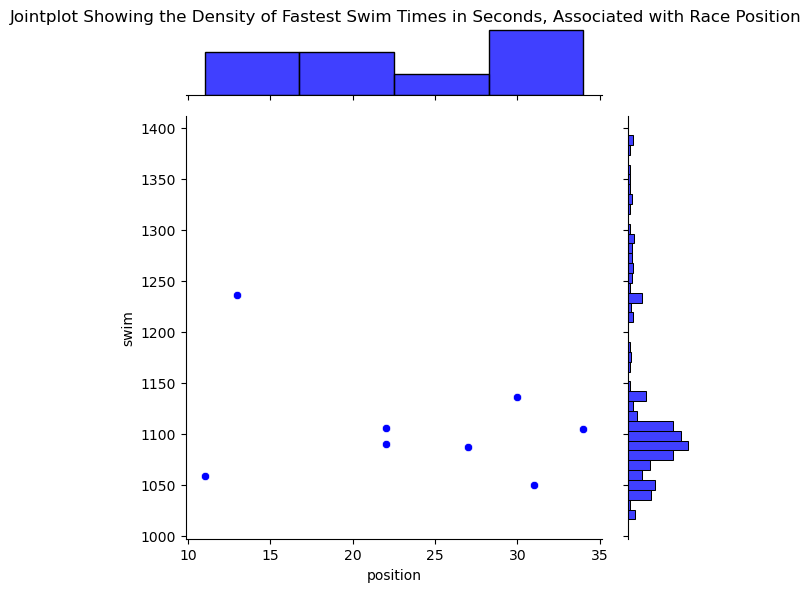

In [38]:
g = sns.jointplot(x=fastest_swim_allrows['position'],
              y=all_df['swim'],
              color="Blue")

g.figure.suptitle('Jointplot Showing the Density of Fastest Swim Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)
g.ax_marg_x(1,9)

TypeError: 'Axes' object is not callable

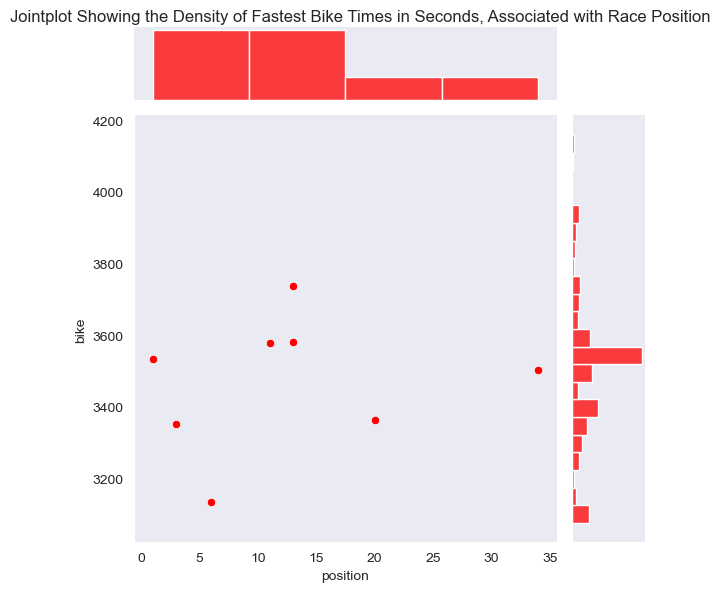

In [132]:
g = sns.jointplot(x=fastest_bike_allrows['position'],
              y=all_df['bike'],
              color="red")

g.figure.suptitle('Jointplot Showing the Density of Fastest Bike Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)
g.ax_marg_x(1,30)

TypeError: 'Axes' object is not callable

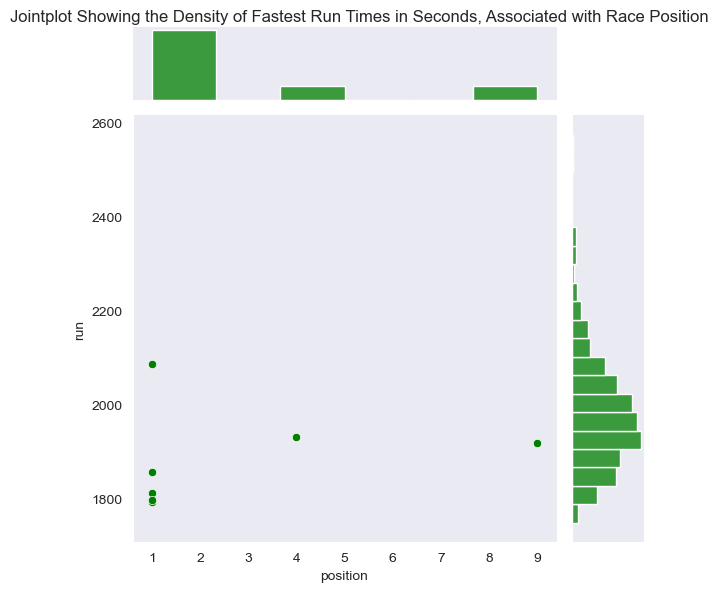

In [133]:
g = sns.jointplot(x=fastest_run_allrows['position'],
              y=all_df['run'],
              color="Green")

g.figure.suptitle('Jointplot Showing the Density of Fastest Run Times in Seconds, Associated with Race Position', fontsize=12)
g.figure.tight_layout()
g.figure.subplots_adjust(top=0.95)
g.ax_marg_x(1,9)

### Fastest in each discipline correlation
1. Again, correlation between the <mark> fastest runners</mark>  and position, observable in tables and jointplot. Although this is noteably weaker than the general correlation between the run discipline and position, previously observed. 

### However
There is a scenario that has not yet been established:
The fastest swimmer might not go on to win, but what about the top5 or top10 fastest of each discipline?
It is possible that the real contender is always within the top5 or top10 swim, and that this might carry through to the bike and then the run. **This needs to be explored further**

In [33]:
#top5
top5_swim_subset = all_df.groupby('event')['swim'].nsmallest(5)
top5_bike_subset = all_df.groupby('event')['bike'].nsmallest(5)
top5_run_subset = all_df.groupby('event')['run'].nsmallest(5)

top_5_swim = all_df[all_df['swim'].isin(top5_swim_subset)]
top_5_bike = all_df[all_df['bike'].isin(top5_bike_subset)]
top_5_run = all_df[all_df['run'].isin(top5_run_subset)]

print(top_5_swim[['swim', 'position']].corr())
print(top_5_bike[['bike', 'position']].corr())
print(top_5_run[['run', 'position']].corr())

              swim  position
swim      1.000000  0.068841
position  0.068841  1.000000
              bike  position
bike      1.000000  0.190363
position  0.190363  1.000000
               run  position
run       1.000000  0.418485
position  0.418485  1.000000


In [34]:

#top 5 smallest values within each 'event' for each discipline
top5_swim_subset = all_df.groupby('event')['swim'].nsmallest(5).reset_index(level=0)
top5_bike_subset = all_df.groupby('event')['bike'].nsmallest(5).reset_index(level=0)
top5_run_subset = all_df.groupby('event')['run'].nsmallest(5).reset_index(level=0)

#merge to filter all_df based on the top 5 for each event and discipline

top_5_swim = pd.merge(all_df, top5_swim_subset, on=['event', 'swim'])

top_5_bike = pd.merge(all_df, top5_bike_subset, on=['event', 'bike'])

top_5_run = pd.merge(all_df, top5_run_subset, on=['event', 'run'])

#correlations
print(top_5_swim[['swim', 'position']].corr())
print(top_5_bike[['bike', 'position']].corr())
print(top_5_run[['run', 'position']].corr())

              swim  position
swim      1.000000  0.026385
position  0.026385  1.000000
              bike  position
bike      1.000000  0.184459
position  0.184459  1.000000
               run  position
run       1.000000  0.396181
position  0.396181  1.000000


In [35]:
top_5_run

,athlete_id,athlete_first_name,athlete_last_name,country,swim,t1,bike,t2,run,position,total_time,event,host_country
0,5302,Simon,Whitfield,CAN,1076.0,21.0,3534.0,17.0,1852.0,1.0,6504.0,sydney_2000,AUS
1,5640,Stefan,Vuckovic,GER,1093.0,21.0,3512.0,17.0,1868.0,2.0,6517.0,sydney_2000,AUS
2,93474,Jan,Rehula,CZE,1065.0,26.0,3534.0,19.0,1880.0,3.0,6525.0,sydney_2000,AUS
3,5336,Dmitriy,Gaag,KAZ,1068.0,22.0,3528.0,17.0,1902.0,4.0,6543.0,sydney_2000,AUS
4,5306,Ivan,Raña Fuentes,ESP,1068.0,22.0,3531.0,17.0,1907.0,5.0,6549.0,sydney_2000,AUS
5,5308,Hamish,Carter,NZL,1099.0,19.0,3624.0,17.0,1924.0,1.0,6666.0,athens_2004,GRE
6,5297,Bevan,Docherty,NZL,1093.0,19.0,3632.0,19.0,1930.0,2.0,6674.0,athens_2004,GRE
7,5298,Greg,Bennett,AUS,1099.0,16.0,3673.0,19.0,1913.0,4.0,6701.0,athens_2004,GRE
8,5298,Greg,Bennett,AUS,1099.0,16.0,3673.0,19.0,1913.0,4.0,6701.0,athens_2004,GRE
9,5325,Hunter,Kemper,USA,1091.0,19.0,3743.0,22.0,1911.0,9.0,6766.0,athens_2004,GRE


In [36]:
#correlations to dataframes
top_5_swim_corr = top_5_swim[['swim', 'position']].corr()
top_5_bike_corr = top_5_bike[['bike', 'position']].corr()
top_5_run_corr = top_5_run[['run', 'position']].corr()

In [37]:
print(top_5_swim_corr)

              swim  position
swim      1.000000  0.026385
position  0.026385  1.000000


In [38]:
top5_correlations = pd.concat((top_5_swim_corr.loc['swim'], top_5_bike_corr.loc['bike'], top_5_run_corr.loc['run']), axis=1)

In [39]:
top5_correlations.style.background_gradient(cmap='coolwarm')

,swim,bike,run
swim,1.000000,nan,nan
position,0.026385,0.184459,0.396181
bike,nan,1.000000,nan
run,nan,nan,1.000000


Text(0, 0.5, 'race position')

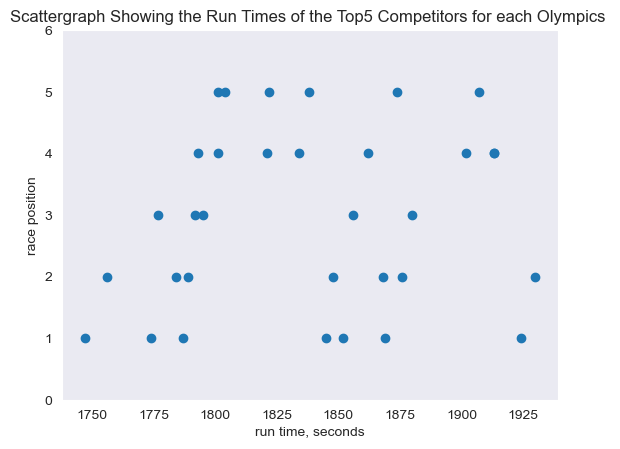

In [76]:
#visualising with scatter. 
plt.scatter(data=top_5_run, x='run', y='position')
plt.title('Scattergraph Showing the Run Times of the Top5 Competitors for each Olympics ')
plt.ylim(0,6)
plt.xlabel('run time, seconds')
plt.ylabel('race position')

In [41]:
#top 10 smallest values within each 'event' for each discipline
top10_swim_subset = all_df.groupby('event')['swim'].nsmallest(10).reset_index(level=0)
top10_bike_subset = all_df.groupby('event')['bike'].nsmallest(10).reset_index(level=0)
top10_run_subset = all_df.groupby('event')['run'].nsmallest(10).reset_index(level=0)

#merge to filter all_df based on the top 10 for each event and discipline

top_10_swim = pd.merge(all_df, top10_swim_subset, on=['event', 'swim'])

top_10_bike = pd.merge(all_df, top10_bike_subset, on=['event', 'bike'])

top_10_run = pd.merge(all_df, top10_run_subset, on=['event', 'run'])

#correlations
print(top_10_swim[['swim', 'position']].corr())
print(top_10_bike[['bike', 'position']].corr())
print(top_10_run[['run', 'position']].corr())

              swim  position
swim      1.000000  0.091593
position  0.091593  1.000000
              bike  position
bike      1.000000  0.253365
position  0.253365  1.000000
               run  position
run       1.000000  0.353466
position  0.353466  1.000000


### top5 and top10 Fastest in each discipline correlation
1. A weak correlation between the <mark> fastest runners</mark>  and position, but more pronounced compared to that of other disciplines.
2. No interesting insights yielded. 


## Variation of discipline times between position categories

Wish to draw a closer connection between the top positions (podium) and fastest of each discipline. By visualising how well, on average, athletes who finished in top positions performed in each discipline compared to those in middle or bottom positions will aid in assessing their relative decisiveness in differentiating competitors. 

In [43]:
# new column to categorise athletes based on position
# 'top', 'middle', and 'bottom' categories based on podium postions, below 10th and above 10th position
df_merged_fastest_times['performance_category'] = pd.cut(
    df_merged_fastest_times['position'],
    bins=[0, 3, 10, float('inf')],
    labels=['Top', 'Middle', 'Bottom'],
)

#analysis of times by performance category, focusing on average
swim_time_summary = df_merged_fastest_times.groupby('performance_category')['swim'].describe()[['mean']].reset_index()
bike_time_summary = df_merged_fastest_times.groupby('performance_category')['bike'].describe()[['mean']].reset_index()
run_time_summary = df_merged_fastest_times.groupby('performance_category')['run'].describe()[['mean']].reset_index()

# Print the summary
print('------- swim --------')
print(swim_time_summary)
print('------- bike --------')
print(bike_time_summary)
print('------- run --------')
print(run_time_summary)



------- swim --------
  performance_category         mean
0                  Top  1096.761905
1               Middle  1097.510204
2               Bottom  1117.607273
------- bike --------
  performance_category         mean
0                  Top  3431.904762
1               Middle  3444.020408
2               Bottom  3499.447273
------- run --------
  performance_category         mean
0                  Top  1838.571429
1               Middle  1875.489796
2               Bottom  2009.640000


/var/folders/79/phpgk8h572b60699bk5qy1r40000gn/T/ipykernel_23412/2931350173.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  swim_time_summary = df_merged_fastest_times.groupby('performance_category')['swim'].describe()[['mean']].reset_index()
/var/folders/79/phpgk8h572b60699bk5qy1r40000gn/T/ipykernel_23412/2931350173.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bike_time_summary = df_merged_fastest_times.groupby('performance_category')['bike'].describe()[['mean']].reset_index()
/var/folders/79/phpgk8h572b60699bk5qy1r40000gn/T/ipykernel_23412/2931350173.py:12: FutureWarning: The default of observe

Text(0.5, 1.0, 'Promedio de Tiempos de Natación, por Categoría de Posición')

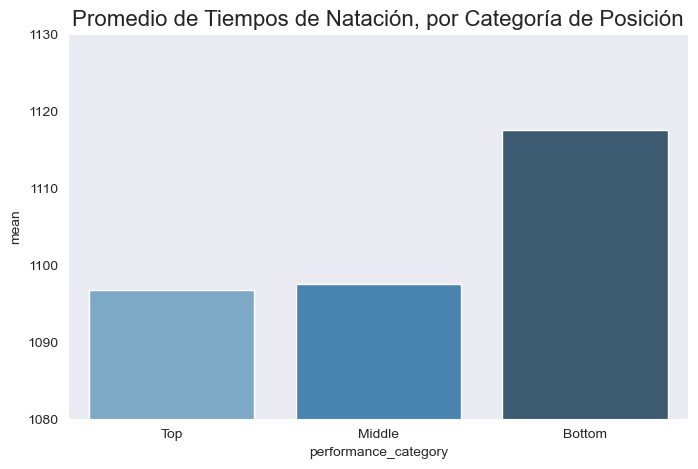

In [128]:
sns.set_style('dark')
plt.figure(figsize=(8, 5))
sns.barplot( x='performance_category', y='mean', data=swim_time_summary, hue='performance_category', palette='Blues_d', legend=False);
plt.ylim(1080,1130)
plt.title('Promedio de Tiempos de Natación, por Categoría de Posición', fontsize=16)



Text(0.5, 1.0, 'Promedio de Tiempos de Bici, por Categoría de Posición')

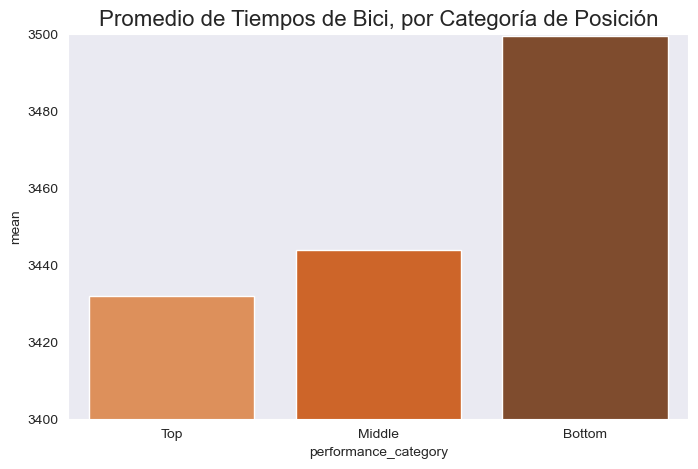

In [129]:
sns.set_style('dark')
plt.figure(figsize=(8, 5))
sns.barplot(data=bike_time_summary, x='performance_category', y='mean', hue='performance_category', palette='Oranges_d', legend=False)
plt.ylim(3400,3500)
plt.title('Promedio de Tiempos de Bici, por Categoría de Posición', fontsize=16)

Text(0.5, 1.0, 'Promedio de Tiempos de Correr, por Categoría de Posición')

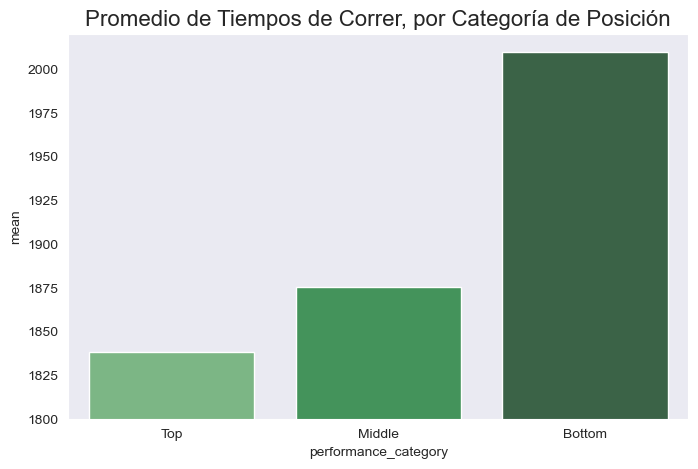

In [130]:
sns.set_style('dark')
plt.figure(figsize=(8, 5))
sns.barplot(run_time_summary, x='performance_category', y='mean', hue='performance_category', palette='Greens_d', legend=False)
plt.ylim(1800,2020)
plt.title('Promedio de Tiempos de Correr, por Categoría de Posición', fontsize=16)

# **Analysis of Variation of Averages in Top vs Middle/Lower Positions**

#### - **Swim Mean Values**:
- 🏊‍♂️ **Small Difference Across Categories**:
    - The **mean swim time difference** between the **Top** and **Middle** categories is **negligible** (_less than 1 second_).
    - Even the **Bottom** category is only about **20 seconds slower** on average.
    - _This suggests that performance in the swim leg has limited influence in differentiating top and middle performers._

---

#### - **Bike Mean Values**:
- 🚴 **Moderate Difference**:
    - The difference in **mean bike times** between the **Top** and **Middle** categories is about **12 seconds**, which is relatively small.
    - However, the gap between the **Top** and **Bottom** categories is more substantial, at **67.5 seconds**.
- 🔍 **Implication**:
    - The **bike leg** shows a **moderate influence** on performance outcomes. 
    - **Stronger cyclists** tend to perform better, but this is not the **primary deciding factor** in distinguishing the **Top** and **Middle** categories.

---

#### - **Run Mean Values**:
- 🏃‍♂️ **Large Difference**:
    - The **mean run time difference** between the **Top** and **Middle** categories is about **37 seconds**.
    - The gap between the **Top** and **Bottom** categories is **over 170 seconds** (_2 minutes, 50 seconds_).
- 🔍 **Implication**:
    - The **run discipline** has the **largest variation** in mean times across performance categories, making it the **most decisive factor**.
    - The ability to **run faster** is crucial for achieving a **top performance** and **clearly distinguishes top athletes** from both **middle** and **bottom** performers.

---

### **Conclusion**

In comparison to the **swim** and **bike** disciplines:
- The **run discipline** stands out in terms of both **variability** and the **strength of correlation** with position.
- It is the **most decisive factor** in determining which athletes reach the **top performance category**.



_Basado en estos promedios, la disciplina más decisiva en un triatlón parece ser la carrera. Los mejores atletas (Top) no se diferencian mucho en natación ni en ciclismo, pero sacan una gran ventaja en la carrera, lo que sugiere que es aquí donde se marcan las diferencias más importantes para obtener las posiciones más altas._